# Titanic 

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline

import pylab as plt
import seaborn as sbs

seaborn.set()

## Load Data

In [3]:
inputTitanic = pd.read_csv('train.csv')

In [4]:
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Display Survival Rate by differents features

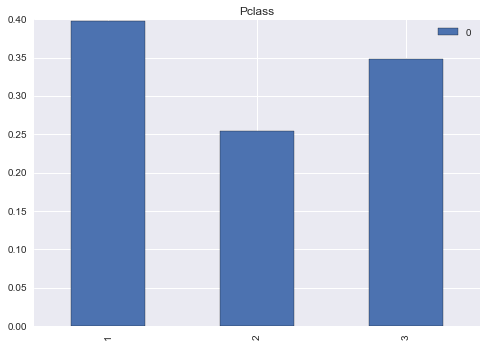

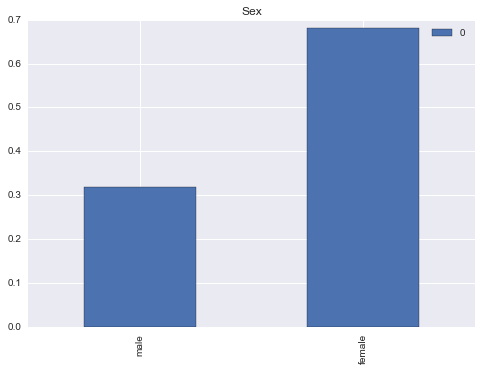

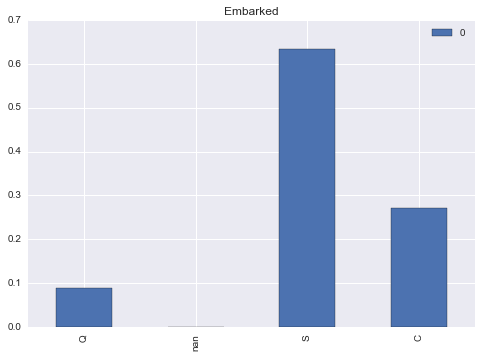

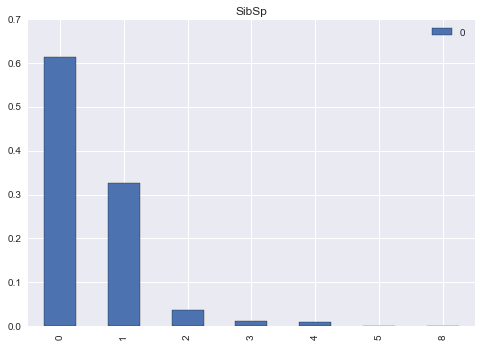

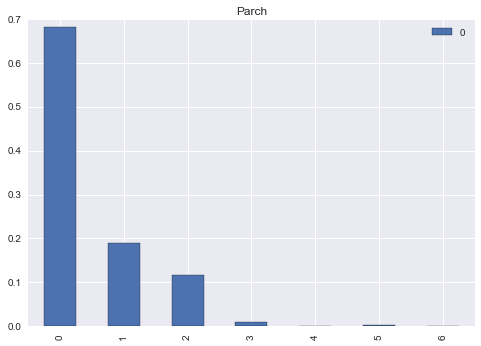

In [85]:
def DisplayRate(data, feature):
    ##Unique labels & values
    ser = data[feature]
    labels = set(ser)
    values = pd.Series(0,index=labels)
    ##For each value calculate the rate
    total = sum(data.Survived)
    for l in labels:    
        values[l]=sum(data.Survived[ser==l])
    values=values/total
    ##Display a plot
    df = pd.DataFrame(values)
    df.plot.bar().set_title(feature)
    plt.show()    
    return
DisplayRate(inputTitanic,'Pclass')
DisplayRate(inputTitanic,'Sex')
DisplayRate(inputTitanic,'Embarked')
DisplayRate(inputTitanic,'SibSp')
DisplayRate(inputTitanic,'Parch')

### Clean Age data because values are missing
We add the median for empty values

In [132]:
ageFilled = inputTitanic.Age.fillna(inputTitanic.Age.median())
inputTitanic['AgeInteger']=map(lambda x:int(round(x)), ageFilled)
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInteger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38


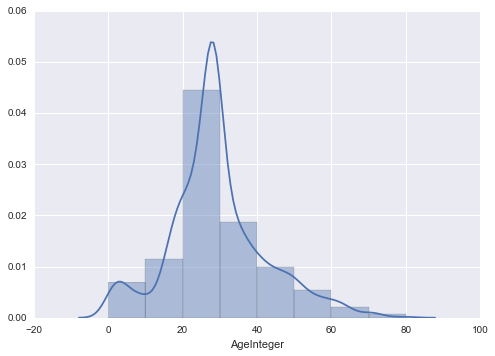

In [139]:
sbs.distplot(inputTitanic.AgeInteger,bins=8)
